In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [3]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Print dataset shapes
print(f"Training features shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing features shape: {x_test.shape}")
print(f"Testing labels shape: {y_test.shape}")


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step 
Training features shape: (404, 13)
Training labels shape: (404,)
Testing features shape: (102, 13)
Testing labels shape: (102,)


In [4]:
# Normalize features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [5]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Linear output for regression
])


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [7]:
history = model.fit(
    x_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    verbose=1
)


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 536.2863 - mae: 21.3641 - val_loss: 552.7076 - val_mae: 21.6868
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 442.5044 - mae: 19.4253 - val_loss: 419.8708 - val_mae: 18.5482
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 298.5532 - mae: 15.4379 - val_loss: 239.3221 - val_mae: 13.1949
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 165.6242 - mae: 10.7188 - val_loss: 109.4647 - val_mae: 8.0614
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 83.4573 - mae: 6.9727 - val_loss: 67.9816 - val_mae: 6.3852
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 51.0886 - mae: 5.5598 - val_loss: 47.2413 - val_mae: 5.2430
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 42.9895 - mae: 4.6338 - val_loss: 33.2175 - val_mae: 4.4522
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27.0572 - mae: 3.7312 - val_loss: 27.1940 - val_mae: 4.0040
Epoch 9/100
21/21 ━━━━━━━━━━━━━━

In [8]:
# Evaluate performance on test set
loss, mae = model.evaluate(x_test_scaled, y_test, verbose=0)
print(f"Test Mean Absolute Error: {mae:.2f}")


Test Mean Absolute Error: 2.85


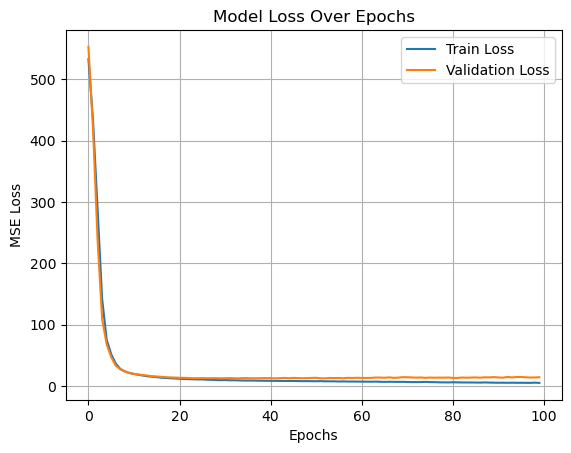

In [9]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()
